In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Credit.csv")

In [2]:
df

,Id,Income,Age,Experience,Married/Single,CURRENT_JOB_YRS,Risk_Flag
0,81157,8451099,70,4,single,4,1
1,59951,893955,28,8,married,3,0
2,246987,7023996,34,15,single,5,1
3,231215,7480946,44,10,single,10,1
4,88820,291391,33,8,single,6,1
...,...,...,...,...,...,...,...
12995,196000,6036428,34,7,single,6,1
12996,95006,7757947,62,5,single,4,0
12997,93040,6894008,66,3,married,3,1
12998,151805,6389669,33,13,married,11,0


In [3]:
corr_features = set()

# 建立相關矩陣
corr_matrix = df.corr()

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
df.drop(labels=corr_features, axis=1, inplace=True)
corr_matrix.style.background_gradient(cmap='coolwarm')

,Id,Income,Age,Experience,CURRENT_JOB_YRS,Risk_Flag
Id,1.000000,0.002327,0.021139,0.001849,0.003358,0.057834
Income,0.002327,1.000000,0.005428,0.002276,-0.008323,-0.024627
Age,0.021139,0.005428,1.000000,-0.006665,0.023894,-0.027803
Experience,0.001849,0.002276,-0.006665,1.000000,0.651680,-0.045290
CURRENT_JOB_YRS,0.003358,-0.008323,0.023894,0.651680,1.000000,-0.007633
Risk_Flag,0.057834,-0.024627,-0.027803,-0.045290,-0.007633,1.000000


In [4]:
df['Married/Single'].replace('single', 0, inplace = True)
df['Married/Single'].replace('married', 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Id               13000 non-null  int64
 1   Income           13000 non-null  int64
 2   Age              13000 non-null  int64
 3   Experience       13000 non-null  int64
 4   Married/Single   13000 non-null  int64
 5   CURRENT_JOB_YRS  13000 non-null  int64
 6   Risk_Flag        13000 non-null  int64
dtypes: int64(7)
memory usage: 711.1 KB


In [5]:
#df = df.astype('float32')

In [6]:
#df.info()

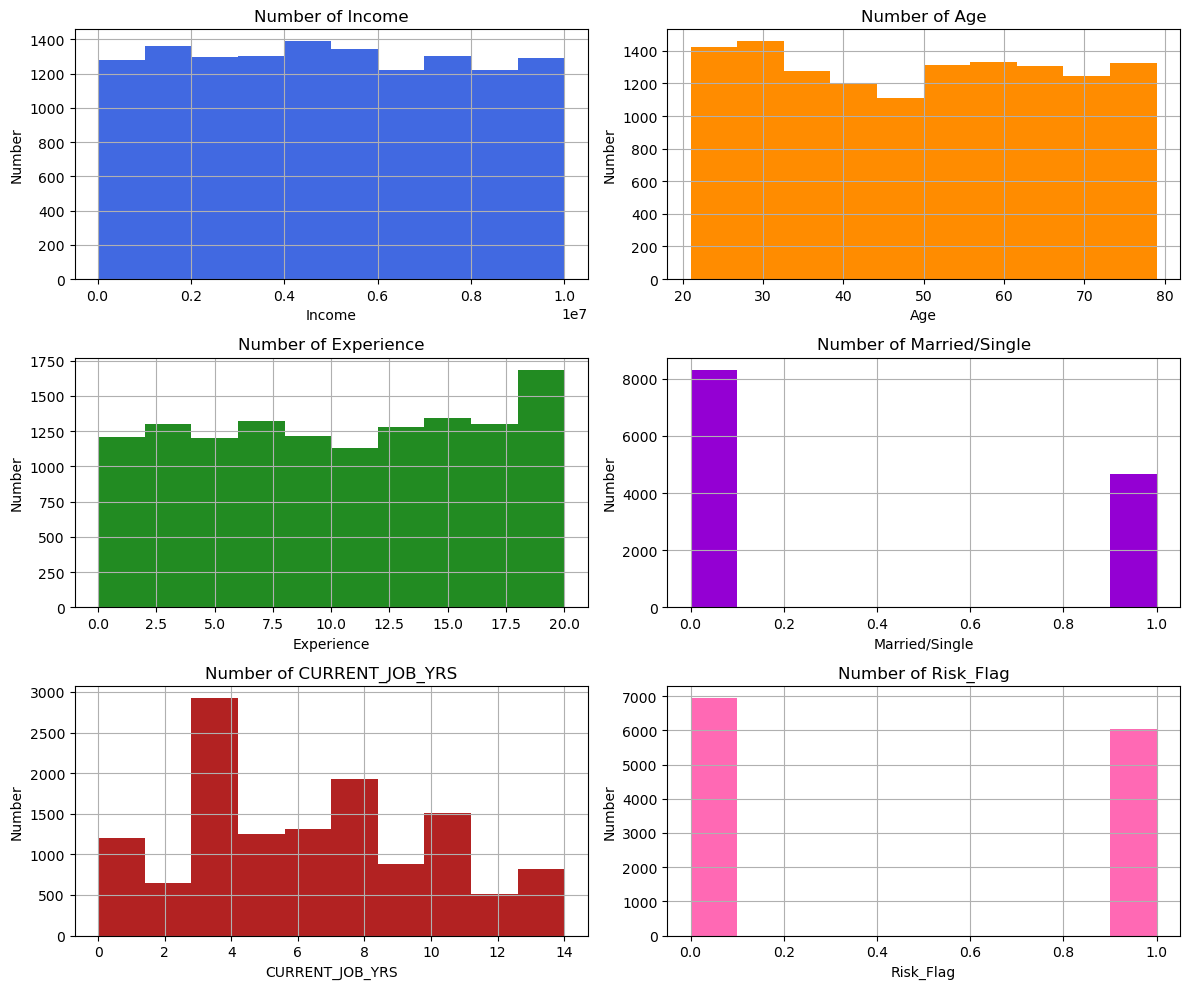

In [7]:
color_list = ['royalblue','darkorange','forestgreen','darkviolet','firebrick','hotpink']
feature_list = ["Income", "Age", "Experience", "Married/Single", "CURRENT_JOB_YRS", "Risk_Flag"]

plt.figure(figsize=(12,10))

for i in range(0,6):
    
    plt.subplot(3,2,i+1)
    hist = df[feature_list[i]].hist(bins = 10, color = color_list[i])
    plt.title("Number of "+str(feature_list[i]))
    plt.xlabel(feature_list[i])
    plt.ylabel("Number")
    plt.tight_layout()
    
plt.show()    

In [8]:
#df.isna().value_counts()

In [9]:
#df = df[df['Experience'] >= df['CURRENT_JOB_YRS']]

In [10]:
#df.info()

In [11]:
df["Married/Single"] = df["Married/Single"].astype(int)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(["Risk_Flag"],axis = 1)
y = df["Risk_Flag"]

In [13]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.svm import SVC

In [16]:

svc = SVC(kernel='rbf',gamma = 12,C= 10)  
svc.fit(X_train, y_train)
predict = svc.predict(X_test)

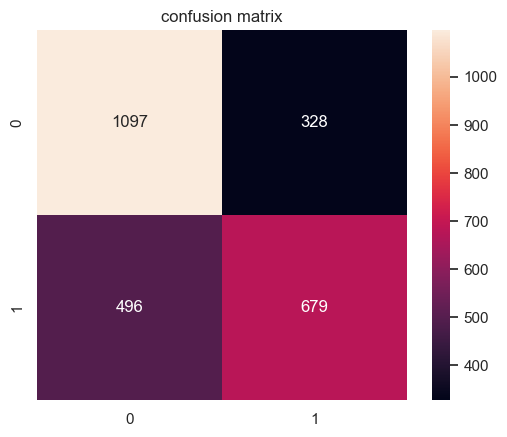

accuracy score:0.683076923076923


In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(predict,y_test)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = True)
plt.title('confusion matrix')
plt.show()
print("accuracy score:"+str(svc.score(X_test,y_test)))